In [38]:
import numpy as np   
import matplotlib.pyplot as plt
import pyclouds

%matplotlib inline

In [39]:
pyclouds.__version__

'v0.2.0+3.g9f284bf.dirty'

In [40]:
from pyclouds.models import parcel as parcel_models, microphysics as microphysics_models
from pyclouds.reference.atmos import stratification_profiles
from pyclouds.reference import constants as reference_constants
from pyclouds import Var

# Dry parcel model

In [41]:
# Ambient state
ambient_stratification = stratification_profiles.Soong1973Dry()

In [42]:
z_points = np.linspace(100., 4e3, 500)
T_e = lambda z: ambient_stratification.temp(z)

z0 = z_points[0]
w0 = 0.1
T0 = T_e(z0) + 0.2
p0 = ambient_stratification.p(z0)

initial_condition = Var.make_state(r=500.0, w=w0, T=T0, p=p0)

In [43]:
cloud_model = parcel_models.DryAirOnly(
    environment=ambient_stratification, constants=reference_constants.default_constants,
    C_D=2.
)

profile = cloud_model.integrate(initial_condition, z_points)

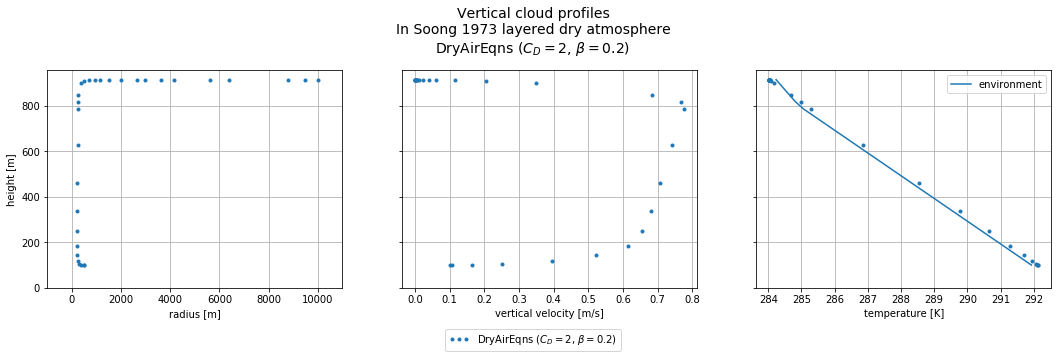

In [44]:
plot = profile.plot(variables=["r", "w", "T",])

# Full thermodynamic equations with finite cond. time microphysics

In [45]:
ambient_stratification = stratification_profiles.RICO()

In [46]:
ambient_stratification.rel_humidity(1000.0)

0.8804656586724556

In [47]:
z0 = 100.0
z_points = np.linspace(z0, 4e3, 50)
T_e = lambda z: ambient_stratification.temp(z)

# start with a rising parcel which is slightly moister than the environment
w0 = 0.1
T0 = T_e(z0)
p0 = ambient_stratification.p(z0)
qv0 = ambient_stratification.q_t(z0) + 0.001

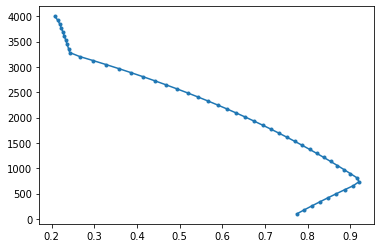

In [48]:
plt.plot(ambient_stratification.rel_humidity(z_points), z_points, marker=".")

/home/earlcd/pytools/pyclouds/models/microphysics.py:64: UserWarning: `model_constraint` not provided, assuming isometric
  warnings.warn("`model_constraint` not provided, assuming isometric")
/home/earlcd/pytools/pyclouds/models/microphysics.py:280: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  "EoS calculation stored within microphysics, should really use something defined externally"
/home/earlcd/pytools/pyclouds/models/microphysics.py:432: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_r = (pi * (qg * rho_l) / (qr * rho_g) * N0r) ** (1.0 / 4.0)
/home/earlcd/pytools/pyclouds/models/parcel.py:573: RuntimeWarning: divide by zero encountered in double_scalars
  l = (8.0 * rho_l * pi * N0 / (q_r * rho_c)) ** 0.25
/home/earlcd/pytools/pyclouds/models/microphysics.py:432: RuntimeWarning: invalid value encountered in double_scalars
  lambda_r = (pi * (qg * rho_l) / (qr * rho_g) * N0r) ** (1.0 / 4.0)
/home/ea

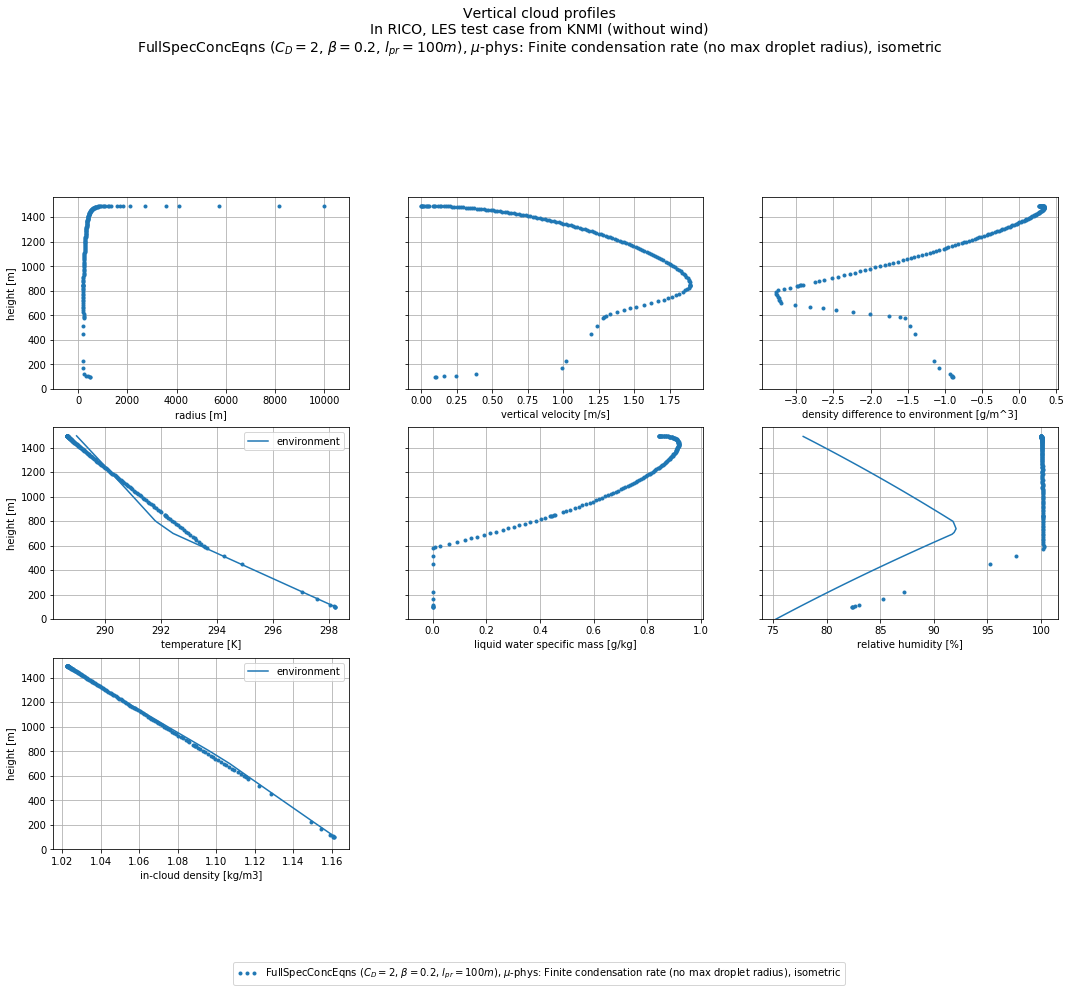

In [30]:
constants = reference_constants.default_constants
microphysics = microphysics_models.FiniteCondensationTimeMicrophysics()

cloud_model = parcel_models.FullThermodynamicsCloudEquations(
    environment=ambient_stratification, constants=constants, C_D=2.,
    microphysics=microphysics
)

initial_condition = Var.make_state(r=500.0, w=w0, T=T0, p=p0, q_v=qv0)
p1 = cloud_model.integrate(initial_condition, z_points, stopping_criterion=None, )

fig = p1.plot(["r", "w", "d_rho", "T", "q_l", "RH", "rho_c"])

In [20]:
p1.integration_stopping_reason

'very_large_radius triggered at 1495.1475121029564'